# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [36]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [37]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10, 250, 387]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   3366  5403    12974    4400              5977          1744
1   3191  1993     1799    1730               234           710
2  20918  1916     1573    1960               231           961

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 

First Sample:

Comparing the first sample to the statistical description of the dataset, the fresh food consumption of the establishment is below the mean of the dataset, actually it is approximately 1/4th of the mean. Milk consumption is around the mean, a little less, but comparable to the mean. Grocery is above the mean but still way less than the maximum grocery requirement in the dataset, by the factor of 8. Detergents_Paper is above the mean consumption of the dataset and Delicatessen too. So, looking at the comparisons from the statistical description of the dataset, this to me looks like Retailer, but rather a small retailer, maybe for a small community.

Second Sample:

Now, comparing the second sample to the statistical description of the dataset, we can see that the purchases for Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen, is all below the mean of the dataset. But we can go ahead and compare the proportions in which these products are being used, when compared we can see that the consumption of Fresh, Milk and Frozen, is the dominant portion of all consumptions. So, this establishment can be a bakery or a cafe.

Third Sample:

Comparing the third sample to the statistical description of the datatset, we can see that the purchases for Fresh products far exceed purchases from any other section, which is above the mean of Fresh product comsumption, the other two dominant purchases are of Milk and Frozen food. Looking at this data and proportion in which the products are used, this establishment looks like a small restaurant where requirement of Fresh supplies is dominant. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [38]:
data.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [39]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
y = data['Grocery']
new_data = data.copy(deep=True)
new_data.drop(['Grocery'], axis = 1, inplace = True)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=170)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predictions of the decision tree regressor on the testset
predictions = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, predictions)

print "The prediction score for the selected target feature is {0:.4f}".format(score)


The prediction score for the selected target feature is 0.7858


### Dependence of features

What we can also do, or what I am inclined to do at this point is to check the dependence of all the features in the dataset. So, the features for which the r2_score will be negative, we can losely assume that those features are independent with respect to the other features for which the r2_score is positive, obviously keeping in mind that we are only using one regressor for this analysis, and there are other parameters which can be tweaked in order to find relative dependencies between the features. 

We are creating a 'dependent_feature' function, which takes as input a 'feature', for which we would like to see, if it can be predicted using a model trained on the rest of the features. This model is evaluated using the 'r2_score' on the predictions made on the test set.

In [40]:
def dependent_feature(feature, X):
    # y: Target feature, the feature which is to be predicted
    # X: Feature on which the regressor is trained in order to predict the target feature
    y = X[feature]
    X.drop([feature], axis=1, inplace=True)
    
    # Making the train, test split on the dataset, with the test_size 25% of the whole dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=170)
    
    # Initializing the decision tree regression and fitting it on the training data
    modelRegressor = DecisionTreeRegressor(random_state=42)
    modelRegressor.fit(X_train, y_train)
    
    # Making predictions on the testset from the model obtained from the decision tree regressor
    preds = modelRegressor.predict(X_test)
    
    # Calculating the r_2 Score for the model, on the testset
    score = r2_score(y_test, preds)
    print "The prediction score for the selected target feature is: {0:.4f}".format(score)
    return score

In [41]:
# Finding dependence for all the features in the dataset based on decision tree regressor

# All the features in the dataset
features = data.columns
ranks = []
for feature in features:
    print "The target feature is: " + str(feature)
    
    # Creating a deep copy for the datatset for every iteration in order to not tamper with the original dataset 
    X = data.copy(deep=True)
    score = dependent_feature(feature, X)
    ranks.append([score, feature])

# Ranking the features with respect to the 'r2_score' obtained on the test set.
print "-------------------------------------------------------------------------------------------------------------------------------"
ranks.sort(key=lambda x: x[0])    
print ranks[::-1]

The target feature is: Fresh
The prediction score for the selected target feature is: -1.7860
The target feature is: Milk
The prediction score for the selected target feature is: 0.2757
The target feature is: Grocery
The prediction score for the selected target feature is: 0.7858
The target feature is: Frozen
The prediction score for the selected target feature is: -0.7854
The target feature is: Detergents_Paper
The prediction score for the selected target feature is: 0.7352
The target feature is: Delicatessen
The prediction score for the selected target feature is: -2.8623
-------------------------------------------------------------------------------------------------------------------------------
[[0.78584483821707085, 'Grocery'], [0.73519563309680125, 'Detergents_Paper'], [0.27574195655412259, 'Milk'], [-0.78535049874426255, 'Frozen'], [-1.7859755312163412, 'Fresh'], [-2.8622914620096793, 'Delicatessen']]


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to predict 'Grocery' and the prediction score(r2_score) on the test data was 0.7858. Given the 'r2_score' received on the test data, 'Grocery' seems highly correlated with some other feature or a set of features in the dataset, and as a result we can either use 'Grocery', or the feature/the set of features which are highly correlated with 'Grocery', in order to capture the underlying pattern in the dataset. That makes 'Grocery', not a necessary feature for identifying customer spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

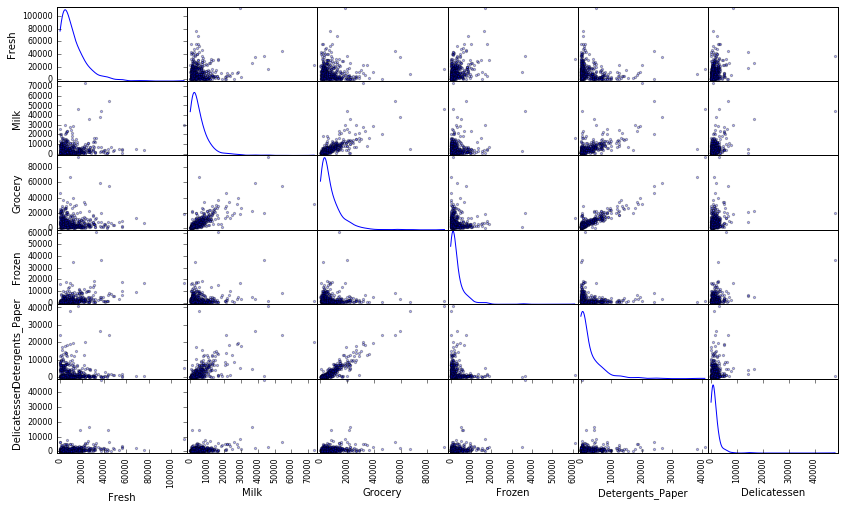

In [43]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** I think 'Grocery' and 'Detergents_paper' exhibit a high degree of correlation, as it can also be seen from the scatter plot of these two features, some other features also exhibit some degree of correlation like 'Milk and 'Grocery'', but it is not as strong as these two features and it further subtantiates, the conclusions we made in the previous section, about the necessity of 'Grocery' as the feature. The data is not normally distributed, as in case of most of the plot above it is packed towards more towards the origin, with exceptions of some of the outliers.

### Verifying correlation between 'Grocery' and 'Detergents_paper' using code

What we can further do in order to verify this correlation, is by training a regressor on the training data, trying to predict one of these features, and removing the other feature from the training data. This should as a result, degrade the value of 'r2_score' on the test data, as the regressor will not be able to capture the underlying pattern, which can predict the value of the other feature, in absence of one. This will further subtantiate this correlation.

In [44]:
X_corr = data.copy(deep=True)
X_corr.drop(['Grocery'], axis=1, inplace=True)
feature = 'Detergents_Paper'
print "{0:.4f}".format(dependent_feature(feature, X_corr))

The prediction score for the selected target feature is: -0.0772
-0.0772


In [45]:
X_corr = data.copy(deep=True)
X_corr.drop(['Detergents_Paper'], axis=1, inplace=True)
feature = 'Grocery'
print "{0:.4f}".format(dependent_feature(feature, X_corr))

The prediction score for the selected target feature is: 0.1195
0.1195


We can see how performance of these features degrades, when we removed the other feature from the dataset and trained the regressor. Adding to that we can see, that 'Grocery', still happens to find some correlation in the dataset, though it is not significant, but it should be coming from some of the features in the dataset. We noticed that 'Milk' and 'Grocery' had some correlation, so maybe it is coming from there.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

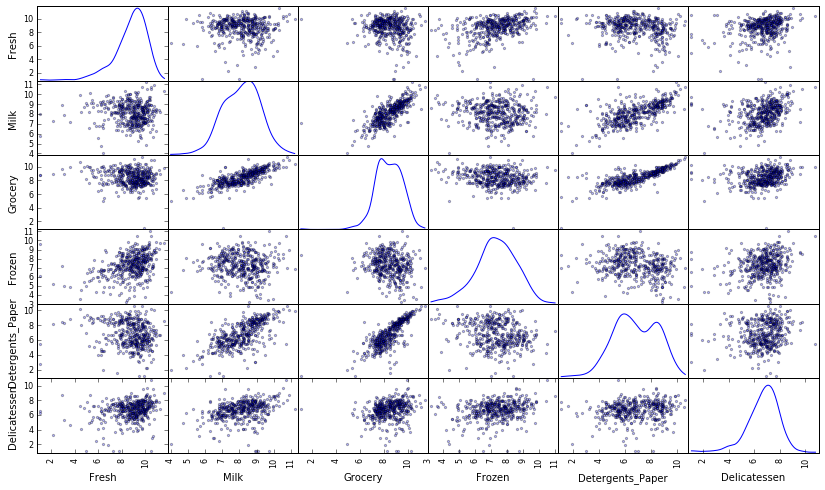

In [46]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [47]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.121480  8.594710  9.470703  8.389360          8.695674      7.463937
1  8.068090  7.597396  7.494986  7.455877          5.455321      6.565265
2  9.948365  7.557995  7.360740  7.580700          5.442418      6.867974

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [48]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are 5 data points which are considered outliers according to the defined metric, for more than one feature. These points should be removed from the dataset, because they will only add unnecessary noise in the dataset which can divert us from what we actually want to analyse, that is, the underlying pattern for majority of the cases here. A very good example can be taken from Macro Economy, where a term GDP is used to define how well a nation is doing in terms of Economic Growth, I am not going into the details, but sometimes a nation with a lot of billionares or a very few very rich people, can give a wrong perception that the nation is doing quite well in terms of the Economic Growth, as those few people contribute largely towards the GDP of a nation, when actually most of the population of the nation is not living in very good conditions. That is why it becomes very important, this discussion of including or excluding outliers, in order to get a sense of real conditions or underlying pattern, it is important that outliers be excluded. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702],
       [-0.67738927,  0.04020501, -0.01953317,  0.31504299, -0.21170161,
         0.62855082],
       [-0.204293  ,  0.01281068,  0.05567564,  0.78544905,  0.20961368,
        -0.54233972],
       [-0.00261356,  0.71923846,  0.3553861 , -0.0330861 , -0.55815441,
        -0.20918629],
       [ 0.02915623, -0.54018269,  0.82053348,  0.02054106, -0.18238824,
         0.01974794]])

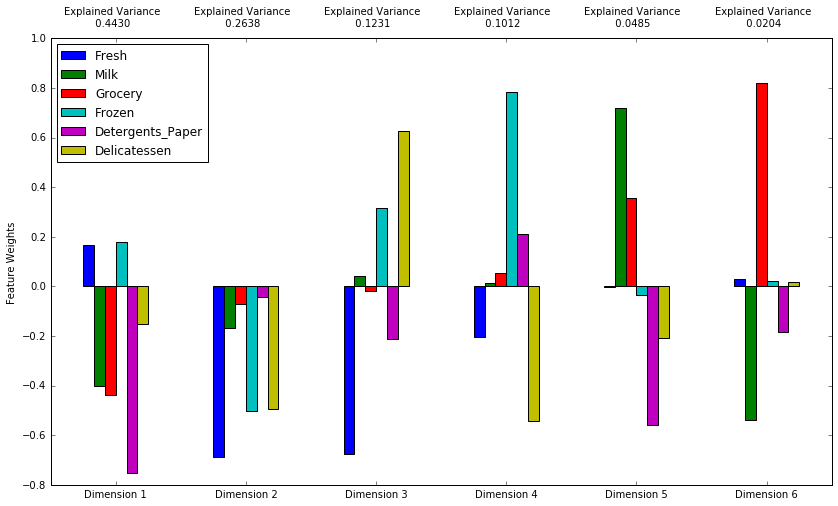

In [49]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
pca.components_

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer: The variance explained in total by the first and second principal component is 0.7216 and the variance explained by the first four principal components is 0.9343. **

**1st Dimension(Positives of Fresh and Frozen | Negatives of Milk, Grocery, Detergents_Paper and Deli)**

The first dimension majorly seems to be representing the inverse relation between the purchases of (Fresh, Frozen) and the puschases of (Milk, Detergents_Paper, Delicatessen). Then two classes of products seem to be inversely related, i.e this dimension represents that if a establishment buys more of Fresh and Frozen food, then it is less likely to buy, products from the category of (Milk, Detergents_Papers, Delicatessen). This explained variance of this dimension is 0.4430.

**2nd Dimension(Dominant negatives Fresh + Frozen + Delicatessen, less dominant negatives Detergents_Paper + Grocery + Milk)**

The second dimension largely explains what I would like to call is, the likeliness of not buying some products over the other, so as to say, as likeliness is relative, we can interpret it as, an establishment is more likely to buy products from (Detergents_Paper, Grocery, Milk) when compared to products from (Fresh, Frozen, Delicatessen), So, that just means that is an establishment buys products from (Detergents_Paper, Grocery, Milk) it is less likely to buy products from (Fresh, Frozen, Delicatessen). The variance explained by second dimension is 0.2638. 


a principal component with opposite signs of feature weight shows that that if the customers spend more in the features with positive weight, they spend less in the features with negative weight. In other words, you can consider the features to be mutually exclusive. This is shown by the third dimension, where Fresh and Deli is inversely correlated.

**3rd Dimension(Dominant positives Delicatessen | Dominant negatives Fresh)**

The third dimension more dominantly establishes, or substantiates the inverse relationship between the products bought by an establishment from (Fresh) and (Delicatessen), it put it this way, if an establishment buys more products from Fresh section, then it is less likely to buy products from the Delicatessen section. The variance explained by this third dimension is 0.1231


**4th Dimension (Dominant positive Frozen | Dominant negative Delicatessen)**

The fourth dimension more dominantly establishes, or substantiates the inverse relationship between the products bought by an establishment from (Frozen) and (Delicatessen), it put it this way, if an establishment buys more products from Frozen section, then it is less likely to buy products from the Delicatessen section. The variance explained by this third dimension is 0.1012

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [50]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.0887      -0.7006       0.8537       1.0105      -0.5587   
1       1.5715       0.6914       0.7154      -0.0264       0.0495   
2       1.9476      -0.7938      -0.3249      -0.4873      -0.0917   

   Dimension 6  
0       0.2495  
1      -0.2803  
2      -0.3035

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [51]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [52]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.0887      -0.7006
1       1.5715       0.6914
2       1.9476      -0.7938

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The advantages of K-means clustering can largely be the fact that it is a a simple clustering algorithm, it has a linear running time, so it can basically scale well on the large datasets, as it is more efficient. It forms tight clusters and performs much better on spherical clusters. K-means clustering is a hard clustering algorithm, which means that all the data points will be assigned to one or the other cluster. 

One major advantage of GMM over k-means clustering would be that it allows soft clustering, that is, as it was in case of k-means clustering that a point can belong to one and only one cluster, but in case of GMM, a point can be shared by more than one cluster. Also, GMM is more flexible in the terms of kind of clusters it can form. K-means clustering is a constrained case of GMM only.

I think GMM can be a more suited algorithm for this project, first because of it's flexibility, and soft clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [53]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, covariance_type='diag', random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=42)
print "{0:.4f}".format(score)

0.4237


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer: The silhouttee score for** 

Cluster centers 2 is 0.4237 

Cluster centers 3 is 0.4067

Cluster centers 4 is 0.3163

Cluster centers 5 is 0.3127

Cluster centers 6 is 0.3408

Cluster centers 7 is 0.3266 

The best silhoutte score is on 2 cluster centers, which is 0.4237.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

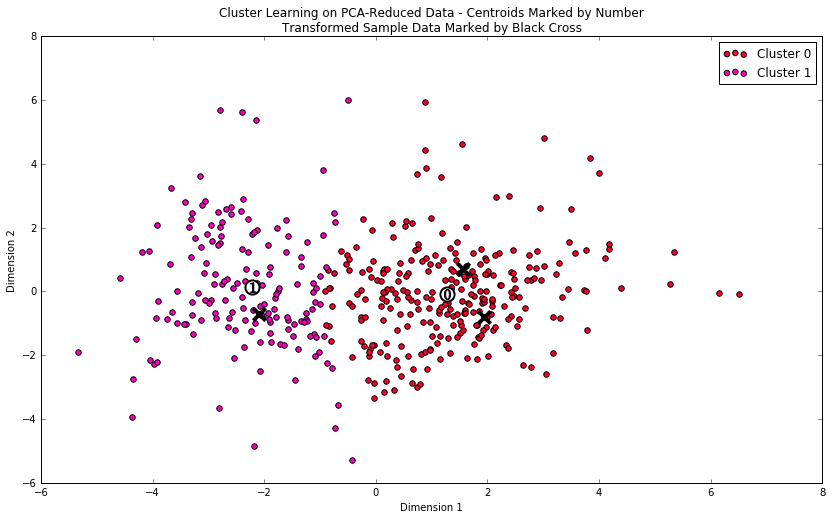

In [54]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [55]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8445.0  2060.0   2716.0  1991.0             345.0         697.0
Segment 1  3984.0  8042.0  12338.0   946.0            4713.0        1044.0

In [56]:
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

Segment 0: 

Looking at the purchases made in segment 0, and comparing it to the statistical description of the dataset we can see that the content of purchases from the Fresh section is the dominant feature but it is still below the mean of the Fresh section for whole dataset. Milk, Grocery, Frozen, Detergents_Paper and Delicatessen is also below the mean of the datatset for the respective features. But when we compare the proportions of these products used, we can see that the total purchases from the Fresh section is more than the cummulative sum of total purchases from all the other sections, and following that are the purchases from Milk, Grocery and Frozen section. This sustantiates, that this establishment has to be a small Cafe/Restaurant/Hotel, which serves fresh food, more from a small community.

Segment 1:

Comparing the purchases from segment 1 to the statistical description of the datatset we can see that dominant purchases come from Grocery, Milk and Detergents_Paper, and the purchases for Grocery is more than the mean for the dataset for Grocery, and the purchases for Detergents_Paper is about the mean of the datatset for Detergents_Paper. All the purchases from the other section are below the mean of the dataset for the respective features. After the comparisons it looks, like this establishment is a retailer, as it is purchasing more food which can be kept as stock.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [57]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

As previously discussed and answered in question 1, my predictions for 3 samples were as follows.

Sample 1:

Comparing the first sample to the statistical description of the dataset, the fresh food consumption of the establishment is below the mean of the dataset, actually it is approximately 1/4th of the mean. Milk consumption is around the mean, a little less, but comparable to the mean. Grocery is above the mean but still way less than the maximum grocery requirement in the dataset, by the factor of 8. Detergents_Paper is above the mean consumption of the dataset and Delicatessen too. So, looking at the comparisons from the statistical description of the dataset, this to me looks like Retailer, but rather a small retailer, maybe for a small community.

I predicted this to be a small retailer, which operates for a small community.

Sample 2:

Now, comparing the second sample to the statistical description of the dataset, we can see that the purchases for Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen, is all below the mean of the dataset. But we can go ahead and compare the proportions in which these products are being used, when compared we can see that the consumption of Fresh, Milk and Frozen, is the dominant portion of all consumptions. So, this establishment can be a bakery or a cafe.

I predicted this sample to be a bakery or a cafe.

Sample 3:

Comparing the third sample to the statistical description of the datatset, we can see that the purchases for Fresh products far exceed purchases from any other section, which is above the mean of Fresh product comsumption, the other two dominant purchases are of Milk and Frozen food. Looking at this data and proportion in which the products are used, this establishment looks like a small restaurant where requirement of Fresh supplies is dominant.

I predicted the third sample to be a restaurant, or rather a small restaurant.


Second part of the question

The predictions made on these sample, seem quite consistent with my initial predictions of this dataset. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** 

The 3 days a week delivery service can be applied to the establishments which can maintain a stock, and do not need fresh stock everyday, establishments like Restaurants and Cafe, which need fresh stock everyday, in order to serve fresh food, cannot react positively to such a change. Retailers or establishments which can keep a stock of the products will react positively to such a change. But then it also depends on the kind of restaurant it is, how busy it is, and things like that or in that case what kind of retailer and there are several other parameters. So, for now customer segment 0 which is more fresh food dependent will react positively to such a change, and customer segment 1 will not react so positively to such a change. Results can be more clear after performing A/B tests.

How are the group of customers defined?

The groups of customers are dominantly defined based on one feature for A/B testing, as prima facie, this seems to be the feature which will be affecting different set of customers. How much supply of Fresh products do a establishment requires? If it requires less Fresh food, daily, or no in that case, then instead of 5 days a week, the same supply of products can be stocked in 3 days in the establishment, i.e the quantity can be increased of the supply and this segment of customers will not be much affected with the change. 

Should we perform A/B test on each group individually?

Now to further identify as to specifically which group of customers are more affected, from the ones who are dependent on Fresh food supply everyday, we can perform A/B test on each group of customers, on the one we assume will respond positively to this change and also the ones who we assume will respond negatively to this change. This will let us further identify whether if there is a group in Fresh product dependent establishment which might repond positively to such a change and if there is some group in not Fresh products dependent establishment which might react negatively to such a change. There can be other parameters which we might miss in our analysis, and they can give rise to such non-intuitive behavior. So, it is better to perform A/B test on both the group of customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
In this case the clustered data can itself serve as a feature, i.e any new instance added to the dataset can just be classified to different customer segments depending on the similarity metric that we use in order to find, to which customer segment is this new instance more closer or similar too, and it will be classified as belonging to that segment only.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

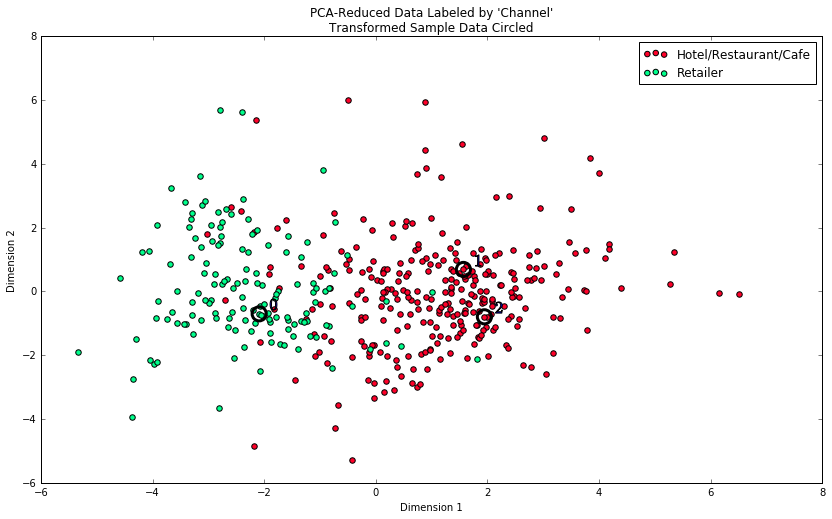

In [58]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** I think the clusters which have been identifying by using Gaussian Mixture Model seems quite right, the algorithm did a good job at finding the two clusters, though there is some region in between where it is hard to distinguish between the two clusters, as some points can seem to belong to either clusters. These classifcations are quite consistence with the definition of customer segments which was given previously. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.